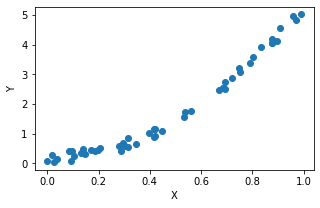

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [23]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [24]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X,y)
output = model.predict(X)
print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )

Adj. R-square: 0.9332371047707784


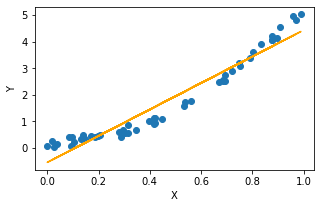

In [27]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
print(X_deg2[:5])

[[4.17022005e-01 1.73907352e-01]
 [7.20324493e-01 5.18867376e-01]
 [1.14374817e-04 1.30815988e-08]
 [3.02332573e-01 9.14049845e-02]
 [1.46755891e-01 2.15372915e-02]]


Adj. R-square: 0.9947910474710182
Adj. R-square: 0.9947910474710182


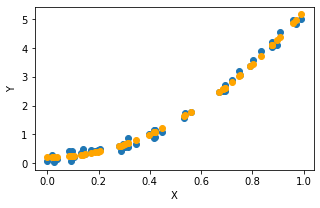

In [29]:
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [34]:
X_poly

array([[1.00000000e+00, 4.17022005e-01, 1.73907352e-01],
       [1.00000000e+00, 7.20324493e-01, 5.18867376e-01],
       [1.00000000e+00, 1.14374817e-04, 1.30815988e-08],
       [1.00000000e+00, 3.02332573e-01, 9.14049845e-02],
       [1.00000000e+00, 1.46755891e-01, 2.15372915e-02],
       [1.00000000e+00, 9.23385948e-02, 8.52641608e-03],
       [1.00000000e+00, 1.86260211e-01, 3.46928663e-02],
       [1.00000000e+00, 3.45560727e-01, 1.19412216e-01],
       [1.00000000e+00, 3.96767474e-01, 1.57424429e-01],
       [1.00000000e+00, 5.38816734e-01, 2.90323473e-01],
       [1.00000000e+00, 4.19194514e-01, 1.75724041e-01],
       [1.00000000e+00, 6.85219500e-01, 4.69525764e-01],
       [1.00000000e+00, 2.04452250e-01, 4.18007224e-02],
       [1.00000000e+00, 8.78117436e-01, 7.71090232e-01],
       [1.00000000e+00, 2.73875932e-02, 7.50080261e-04],
       [1.00000000e+00, 6.70467510e-01, 4.49526682e-01],
       [1.00000000e+00, 4.17304802e-01, 1.74143298e-01],
       [1.00000000e+00, 5.58689

Adj. R-square for Model Degree1: 0.9318166176382416


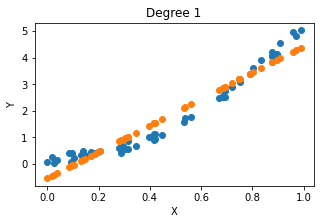

Adj. R-square for Model Degree2: 0.994564571274106


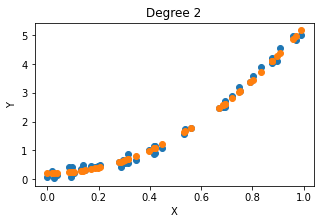

Adj. R-square for Model Degree3: 0.9944735532438161


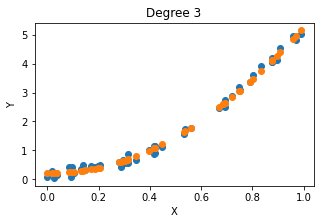

Adj. R-square for Model Degree4: 0.9954971261912255


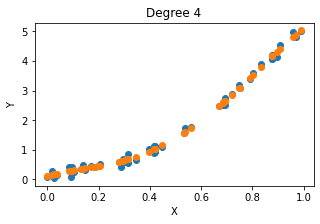

Adj. R-square for Model Degree5: 0.995442243943045


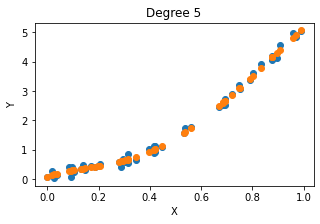

In [36]:
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6): # i = degree

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'Adj. R-square for Model Degree{i}: {adj_r(r2_score(y,output),X_poly_scaled,y )}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()

In [43]:
from sklearn.pipeline import make_pipeline

In [44]:
scaler = StandardScaler()
poly = PolynomialFeatures(2)
model = LinearRegression()

In [45]:
polyreg_scaled = make_pipeline(poly,scaler,model)

In [46]:
polyreg_scaled.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [47]:
polyreg_scaled.score(X,y)

0.9948973526246709

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
from sklearn.metrics import mean_squared_error

degrees = 15 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

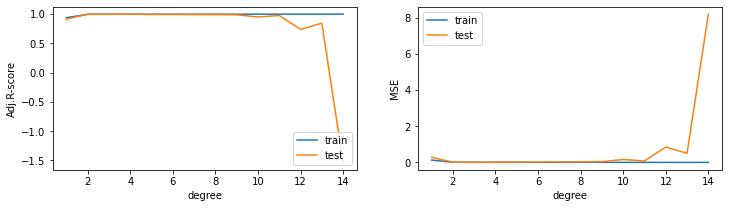

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 15)), train_scores, label="train")
axes[0].plot(list(range(1, 15)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 15)), train_loss, label="train")
axes[1].plot(list(range(1, 15)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()